# NP

This module collects miscellaneous functions I created while working on the nodal precession paper (hence NP). There are 5 packages within this module:

- eigenfrequencies
    - *This entire package was superseded by the LL_secular package in the Functions module*
- functions
    1. Laplace_coeff
    1. i1i2calc
    - *The remaining functions are either duplicated or superseded by Functions.LL_secular*
- invariable_plane
    1. rotate_to_IP_angles
    1. rotate_to_IP_sim
    1. rotate_to_IP_sim_cartesian
    1. rotate_to_IP_sim_sim
- LW11
    1. gamma
    1. pomegadot
    1. Omegadot
- MD4_derivation
    1. Omper_instant
    1. Omdot_instant
    1. Omdot_b_instant
    1. Omdot_c_instant
    1. Omper
    1. Omdot
    1. Omdot_b
    1. Omdot_c

## functions

Most of the functionality in this package was later updated into the LL_secular package in the Functions module. The first of the two remaining unique functions numerically solves the Laplace coefficient equation:

$$b_s^{(j)} (\alpha) = \frac{1}{\pi} \int_0^{2\pi} \frac{\text{cos} j\phi \, d\psi}{(1-2\alpha\text{cos}\psi + \alpha^2)^s}$$

In [1]:
import functions

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import astropy.units as u

In [2]:
#Laplace coefficients are a function of alpha
#defined for a combination of positive half-integers (s) and integers (j)

alpha1 = .8
alpha2 = .3
s1 = 3/2
s2 = 5/2
j1 = 1
j2 = 2

L1 = functions.Laplace_coeff(alpha1,s1,j1)
L2 = functions.Laplace_coeff(alpha2,s1,j1)
L3 = functions.Laplace_coeff(alpha1,s2,j2)
L4 = functions.Laplace_coeff(alpha2,s2,j2)

print('b_3/2^(1) [alpha1]',L1)
print('b_3/2^(1) [alpha2]',L2)
print('b_5/2^(2) [alpha1]',L3)
print('b_5/2^(2) [alpha2]',L4)

b_3/2^(1) [alpha1] 16.886560765276432
b_3/2^(1) [alpha2] 1.0744577342656925
b_5/2^(2) [alpha1] 283.3938986621662
b_5/2^(2) [alpha2] 1.1227666732240402


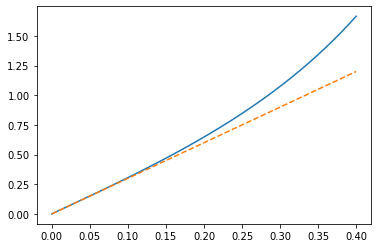

In [3]:
#we can check a common approximation that L_3/2_(1)~3alpha for low alpha

alphas = np.linspace(0,.4,num=1000)
Ls = [functions.Laplace_coeff(alph,3/2,1) for alph in alphas]

plt.plot(alphas,Ls)
plt.plot(alphas,3*alphas,'--')

The second remaining unique function was so that I knew what inclinations to assign to each of the planets in a planet pair (referenced to the invariable plane) in order to have the desired mutual inclination. This allowed me to create simulations that I knew were in the invariable plane without having to rotate them.

In [4]:
#i1i2calc gives the inclination of both planets (referenced to invariable plane) for a given mutual inclination

mutual_inclination = (10*u.deg).to_value(u.rad)
Mstar = (1*u.Msun).to_value(u.Mjupiter)
m1 = 1
m2 = 0.3
period_ratio = 3.41
ecc1 = 0.05
ecc2 = 0.08
    
inc1,inc2 = functions.i1i2calc(mutual_inclination,Mstar,m1,m2,period_ratio,ecc1,ecc2)

print('inc1 =',inc1)
print('inc2 =',inc2)

inc1 = 0.05414450708114703
inc2 = 0.12038841811828592


## invariable_plane

This package contains various functions to rotate a simulated system into the invariable plane (that is, the total angular momentum vector is entirely in the $\vec{z}$ direction).

In [5]:
import invariable_plane

import numpy as np
import rebound

In [6]:
#rotate_to_IP_angles uses a set of parameters as an input and returns the rotated angles (inc, Omega, omega)
#omega does not have to be provided as an input
#assumes Omega=0 for the input orbits
#if the system cannot be rotated into the IP (using a threshold of 10^-4 in the unit L vector), prints an error

#simplified system based on outer solar system
masses = np.array([1 *u.Msun/u.Mjupiter,1,.3,.046,.054]) #Mjupiter
periods = np.array([4331,10747,30589,59800]) #day

#made up inclinations (in rads)
incs = np.array([1.5,1.7,1.6,1.4])

#circular orbits
eccs = np.zeros(len(incs))

rotated_angles = invariable_plane.rotate_to_IP_angles(masses,periods,eccs,incs)

incs_new = rotated_angles[0,:]
Omegas_new = rotated_angles[1,:]
omegas_new = rotated_angles[2,:]

print('old inc / new inc / new Omega')
for i,inew,Omnew in zip(incs,incs_new,Omegas_new):
    print(i,inew,Omnew)

old inc / new inc / new Omega
1.5 0.047384562744299925 0.0
1.7 0.1524293467429071 -3.1414204696861003
1.6 0.052602826460569546 -3.1409407591032705
1.4 0.14733496613303054 -0.0014129583972532064


In [7]:
#eccentric orbits
eccs = np.array([.1,.05,.3,.02])
omegas = np.array([1.5,.5,0,2])
#if no omegas are specified, the function will assign random ones

rotated_angles = invariable_plane.rotate_to_IP_angles(masses,periods,eccs,incs,omegas)

incs_new = rotated_angles[0,:]
Omegas_new = rotated_angles[1,:]
omegas_new = incs_new = rotated_angles[2,:]

print('old inc / new inc / new Omega')
for i,inew,Omnew in zip(incs,incs_new,Omegas_new):
    print(i,inew,Omnew)

old inc / new inc / new Omega
1.5 -1.641999490076612 0.0
1.7 0.5102375555416266 -3.1410891791900744
1.6 0.005164114758878387 -3.141138025632408
1.4 -1.1961029751090344 -0.0011132087521824171


In [8]:
#now let's show what happens if it doesn't work
#new set of made up inclinations (in rads)
incs = np.array([.1,1.7,0,3.1])

#circular orbits
eccs = np.zeros(len(incs))

rotated_angles = invariable_plane.rotate_to_IP_angles(masses,periods,eccs,incs)

OOPS, rotated Lhat [1.34625506e-17 3.34175033e-01 9.42511033e-01]


In [9]:
#you still get an output
#but you can see from the unit angular momentum vector (Lhat) that it may not be accurate
print(rotated_angles)

[[ 3.11998639e-01  1.12082844e+00  5.13395409e-01  2.54342325e+00]
 [ 0.00000000e+00 -3.14039375e+00 -1.65836806e-03  3.13955235e+00]
 [-2.63248758e+00 -1.50746669e+00 -1.93971723e+00  1.32010474e+00]]


In [10]:
#rotate_to_IP_sim takes the same input parameters but returns a rebound simulation object rather than the angles

#simplified system based on outer solar system
masses = np.array([1 *u.Msun/u.Mjupiter,1,.3,.046,.054]) #Mjupiter
periods = np.array([4331,10747,30589,59800]) #day

#made up inclinations (in rads)
incs = np.array([1.5,1.7,1.6,1.4])

#circular orbits
eccs = np.zeros(len(incs))

rotated_sim = invariable_plane.rotate_to_IP_sim(masses,periods,eccs,incs)

#compare with angles from rotate_to_IP_angles
orbs = rotated_sim.calculate_orbits(primary=rotated_sim.particles[0]) #gets astrocentric orbital elements
print('old inc / new inc / new Omega')
for j in range(4):
    print(incs[j],orbs[j].inc,orbs[j].Omega)

old inc / new inc / new Omega
1.5 0.047384562744299925 0.0
1.7 0.1526249770102865 3.1405542627484553
1.6 0.052454284409103595 -3.140987370082364
1.4 0.14732956007831854 0.00017642877024328892


In [11]:
#rotate_to_IP_sim_cartesian takes a set of xyz positions and velocities and the masses
#returns a rebound simulation object in the invariable plane

#simplified system based on outer solar system
masses = np.array([1 *u.Msun/u.Mjupiter,1,.3,.046,.054]) #Mjupiter
periods = np.array([4331,10747,30589,59800]) #day

#made up inclinations (in rads)
incs = np.array([1.5,1.7,1.6,1.4])

#eccentric orbits
eccs = np.array([.1,.05,.3,.02])
omegas = np.array([1.5,.5,0,2])

#create a simulation to get the cartesian coordinates
#but maybe you have the coordinates from another simulation software or something
sim0 = rebound.Simulation()
sim0.add(m=masses[0])
for i in range(4):
    sim0.add(m=masses[i+1],P=periods[i],inc=incs[i],e=eccs[i],omega=omegas[i])

pos_xyz = np.empty((sim0.N,3))
vel_xyz = np.empty((sim0.N,3))
for j in range(sim0.N):
    pos_xyz[j,0] = sim0.particles[j].x
    pos_xyz[j,1] = sim0.particles[j].y
    pos_xyz[j,2] = sim0.particles[j].z
    vel_xyz[j,0] = sim0.particles[j].vx
    vel_xyz[j,1] = sim0.particles[j].vy
    vel_xyz[j,2] = sim0.particles[j].vz

rotated_sim = invariable_plane.rotate_to_IP_sim_cartesian(masses,pos_xyz,vel_xyz)

#compare with angles from rotate_to_IP_angles
orbs = rotated_sim.calculate_orbits(primary=rotated_sim.particles[0]) #gets astrocentric orbital elements
print('old inc / new inc / new Omega')
for j in range(4):
    print(incs[j],orbs[j].inc,orbs[j].Omega)

old inc / new inc / new Omega
1.5 0.04735346703301078 0.0
1.7 0.15252852155921967 -3.1410891791900744
1.6 0.052636040955341475 -3.141138025632408
1.4 0.14737131327428954 -0.0011132087521824171


In [12]:
#rotate_to_IP_sim_sim takes a rebound simulation as an input and returns a rotated rebound simulation
#also returns a True/False about whether the rotation was successful

#simplified system based on outer solar system
masses = np.array([1 *u.Msun/u.Mjupiter,1,.3,.046,.054]) #Mjupiter
periods = np.array([4331,10747,30589,59800]) #day

#made up inclinations (in rads)
incs = np.array([1.5,1.7,1.6,1.4])

#eccentric orbits
eccs = np.array([.1,.05,.3,.02])
omegas = np.array([1.5,.5,0,2])

#create a simulation
sim0 = rebound.Simulation()
sim0.add(m=masses[0])
for i in range(4):
    sim0.add(m=masses[i+1],P=periods[i],inc=incs[i],e=eccs[i],omega=omegas[i])

status,rotated_sim = invariable_plane.rotate_to_IP_sim_sim(sim0)

print('rotated into IP:',status)
#compare with angles from rotate_to_IP_angles
orbs = rotated_sim.calculate_orbits(primary=rotated_sim.particles[0]) #gets astrocentric orbital elements
print('old inc / new inc / new Omega')
for j in range(4):
    print(incs[j],orbs[j].inc,orbs[j].Omega)

rotated into IP: True
old inc / new inc / new Omega
1.5 0.04735346703301078 0.0
1.7 0.15252852155921967 -3.1410891791900744
1.6 0.052636040955341475 -3.141138025632408
1.4 0.14737131327428954 -0.0011132087521824171


In [13]:
#now let's show what happens if it doesn't work
#new set of made up inclinations (in rads)
incs = np.array([.1,1.7,0,3.1])

#create a simulation
sim0 = rebound.Simulation()
sim0.add(m=masses[0])
for i in range(4):
    sim0.add(m=masses[i+1],P=periods[i],inc=incs[i],e=eccs[i],omega=omegas[i])

status,rotated_sim = invariable_plane.rotate_to_IP_sim_sim(sim0)

print('rotated into IP:',status)

#see what the Lhat vector is
Lrot = rotated_sim.calculate_angular_momentum()
print('Lhat = ',Lrot/np.linalg.norm(Lrot))

#still can check the angles though
orbs = rotated_sim.calculate_orbits(primary=rotated_sim.particles[0]) #gets astrocentric orbital elements
print('old inc / new inc / new Omega')
for j in range(4):
    print(incs[j],orbs[j].inc,orbs[j].Omega)

rotated into IP: False
Lhat =  [7.72128728e-18 3.31842971e-01 9.43334640e-01]
old inc / new inc / new Omega
0.1 0.31662241784290973 0.0
1.7 1.1178372016809683 -3.1411617714460203
0.0 0.516349647778409 0.0005120598917466333
3.1 2.5409442850864856 3.13994618998184


## LW11

This package contains an implementation of three equations from Lithwick & Wu 2011.

Equation 15: $\gamma \equiv \frac{3}{4}\frac{m_J}{M_\odot} \alpha^3 \left ( \frac{G M_\odot}{a^3} \right ) ^{1/2}$

Equation 31: $g \equiv \frac{d \varpi}{d t} |_{\epsilon_J = i_J = 0} = \gamma (1-\frac{1}{2}p_e-2p_i)$

Equation 33: $s \equiv \frac{d \Omega}{d t} |_{\epsilon_J = i_J = 0} = \gamma (-1+\frac{1}{2}p_i-2p_e)$

In [14]:
import LW11

import numpy as np
import astropy.units as u
%matplotlib inline
import matplotlib.pyplot as plt

In [15]:
#gamma
#this equation applies for an inner test particle
#inputs should be in units of AU and Mearth
#output frequency is rad per year

#massless Earth and Jupiter
aE = 1
aJ = 5.2
Msun = (1*u.Msun).to_value(u.Mearth)
mJ = (1*u.Mjup).to_value(u.Mearth)

freq = LW11.gamma(aE,aJ,mJ,Msun)

print('gamma =',freq)

gamma = 3.199202314232446e-05


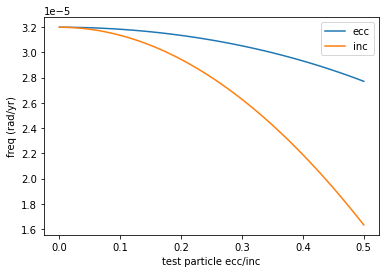

In [16]:
#pomegadot
#this is the "free nonlinear apsidal frequency"
#that is, how the apsidal freq changes based on the test particle's e and i

eccs_E = np.linspace(0,.5)
freqs1 = [LW11.pomegadot(aE,aJ,mJ,Msun,eE,0) for eE in eccs_E]

incs_E = np.linspace(0,.5)
freqs2 = [LW11.pomegadot(aE,aJ,mJ,Msun,0,iE) for iE in incs_E]

plt.plot(eccs_E,freqs1,label='ecc')
plt.plot(incs_E,freqs2,label='inc')
plt.xlabel('test particle ecc/inc')
plt.ylabel('freq (rad/yr)')
plt.legend()

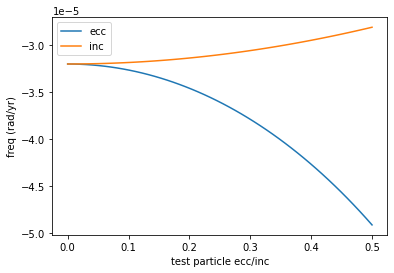

In [17]:
#Omegadot
#same thing but for nodal freq

eccs_E = np.linspace(0,.5)
freqs1 = [LW11.Omegadot(aE,aJ,mJ,Msun,eE,0) for eE in eccs_E]

incs_E = np.linspace(0,.5)
freqs2 = [LW11.Omegadot(aE,aJ,mJ,Msun,0,iE) for iE in incs_E]

plt.plot(eccs_E,freqs1,label='ecc')
plt.plot(incs_E,freqs2,label='inc')
plt.xlabel('test particle ecc/inc')
plt.ylabel('freq (rad/yr)')
plt.legend()

## MD4_derivation

This package contains an implementation of the equations included in Bailey & Fabrycky 2020 developed from Murray & Dermott 1999.

For all functions, the masses can be given in any unit as long as they are all the same, angles must be in radians, and the system must be in the invariable plane. $\omega$s are optional; if not provided, the relevant terms are dropped from the calculation (this does affect the results!).

All the functions are done in the form of $\dot{\Omega}$ and $P_\Omega$. These are easily converted between one another; the $\dot{\Omega}$ provides a direction (which is usually negative for nodal precession), but the values are very tiny, making $P_\Omega$ easier for comparisons and conceptualizing.

In [18]:
import MD4_derivation

import numpy as np

In [19]:
#Omper_instant
#this gives the nodal precession period in units of the inner planet's period at a single point in time
#this is an average of equations 4 and 5 from BF20 (which should be equal anyway)

#using one of our examples from earlier since it's already in the IP

Mstar = (1*u.Msun).to_value(u.Mjupiter)
m1 = 1
m2 = 0.3
P1 = 1
P2 = 3.41
alpha = (P2/P1)**(-2/3)
ecc1 = 0.05
ecc2 = 0.08
i1 = 0.05414450708114703
i2 = 0.12038841811828592
om1 = .6
om2 = 1.3

#without omega
period1 = MD4_derivation.Omper_instant(alpha,P1,m1,m2,Mstar,ecc1,ecc2,i1,i2)

#with omega
period2 = MD4_derivation.Omper_instant(alpha,P1,m1,m2,Mstar,ecc1,ecc2,i1,i2,om1,om2)

print('P_Om =',period1,'(no omega)')
print('P_Om =',period2,'(with omega)')

P_Om = 11374.23665133447 (no omega)
P_Om = 11156.05244107205 (with omega)


In [20]:
#Omdot_instant
#same as the Omper_instant except now it gives the frequency in radians per unit of P1

#without omega
freq1 = MD4_derivation.Omdot_instant(alpha,P1,m1,m2,Mstar,ecc1,ecc2,i1,i2)

#with omega
freq2 = MD4_derivation.Omdot_instant(alpha,P1,m1,m2,Mstar,ecc1,ecc2,i1,i2,om1,om2)

print('f_Om =',freq1,'(no omega)')
print('f_Om =',freq2,'(with omega)')

#should convert to the same period as Omper_instant
print('P_Om =',abs(2*np.pi/freq1),'(no omega)')
print('P_Om =',abs(2*np.pi/freq2),'(with omega)')

f_Om = -0.0005524050096533219 (no omega)
f_Om = -0.0005632086564999867 (with omega)
P_Om = 11374.23665133447 (no omega)
P_Om = 11156.05244107205 (with omega)


In [21]:
#Omdot_b_instant
#same as Omdot_instant except instead of average the values for inner and outer, just returns the inner
#equation 4 from BF20

#without omega
freq1 = MD4_derivation.Omdot_b_instant(alpha,P1,m1,m2,Mstar,ecc1,ecc2,i1,i2)

#with omega
freq2 = MD4_derivation.Omdot_b_instant(alpha,P1,m1,m2,Mstar,ecc1,ecc2,i1,i2,om1,om2)

print('fb_Om =',freq1,'(no omega)')
print('fb_Om =',freq2,'(with omega)')

fb_Om = -0.0005523372699616928 (no omega)
fb_Om = -0.000563147526844603 (with omega)


In [22]:
#Omdot_c_instant
#same as Omdot_instant except instead of average the values for inner and outer, just returns the outer

#without omega
freq1 = MD4_derivation.Omdot_c_instant(alpha,P1,m1,m2,Mstar,ecc1,ecc2,i1,i2)

#with omega
freq2 = MD4_derivation.Omdot_c_instant(alpha,P1,m1,m2,Mstar,ecc1,ecc2,i1,i2,om1,om2)

print('fc_Om =',freq1,'(no omega)')
print('fc_Om =',freq2,'(with omega)')

fc_Om = -0.000552472749344951 (no omega)
fc_Om = -0.0005632697861553703 (with omega)


In [23]:
#if Omdot_c_instant and Omdot_b_instant are not basically equal
#then your system is not in the invariable plane!

In [24]:
#Omper
#this gives the nodal precession period in units of the inner planet's period averaged over time
#again this is an average of the inner/outer periods
#this is what the observed nodal period should correspond with
#removes 3 of the omega-dependent terms, however the difference in omegas still matters
#though again, omegas are not required and if not provided that term will be dropped

#without omega (will be the same os Omper_instant)
period1 = MD4_derivation.Omper(alpha,P1,m1,m2,Mstar,ecc1,ecc2,i1,i2)

#with omega
period2 = MD4_derivation.Omper(alpha,P1,m1,m2,Mstar,ecc1,ecc2,i1,i2,om1,om2)

print('P_Om (avg) =',period1,'(no omega)')
print('P_Om (avg) =',period2,'(with omega)')

P_Om (avg) = 11374.23665133447 (no omega)
P_Om (avg) = 11187.905520251466 (with omega)


In [25]:
#Omdot
#same as Omper except returns instead the frequency in rad per unit of P1

#without omega (will be the same os Omdot_instant)
freq1 = MD4_derivation.Omdot(alpha,P1,m1,m2,Mstar,ecc1,ecc2,i1,i2)

#with omega
freq2 = MD4_derivation.Omdot(alpha,P1,m1,m2,Mstar,ecc1,ecc2,i1,i2,om1,om2)

print('f_Om (avg) =',freq1,'(no omega)')
print('f_Om (avg) =',freq2,'(with omega)')

#should convert to the same period as Omper_instant
print('P_Om (avg) =',abs(2*np.pi/freq1),'(no omega)')
print('P_Om (avg) =',abs(2*np.pi/freq2),'(with omega)')

f_Om (avg) = -0.0005524050096533219 (no omega)
f_Om (avg) = -0.0005616051454676891 (with omega)
P_Om (avg) = 11374.23665133447 (no omega)
P_Om (avg) = 11187.905520251466 (with omega)


In [26]:
#Omdot_b
#same as Omdot except provides value for inner planet only

#Omdot_c
#same as Omdot except provides value for inner planet only

#these should be equal for planets in the invariable plane

#without omega (will be the same os Omdot_instant)
freq1_b = MD4_derivation.Omdot_b(alpha,P1,m1,m2,Mstar,ecc1,ecc2,i1,i2)
freq1_c = MD4_derivation.Omdot_c(alpha,P1,m1,m2,Mstar,ecc1,ecc2,i1,i2)

#with omega
freq2_b = MD4_derivation.Omdot_b(alpha,P1,m1,m2,Mstar,ecc1,ecc2,i1,i2,om1,om2)
freq2_c = MD4_derivation.Omdot_c(alpha,P1,m1,m2,Mstar,ecc1,ecc2,i1,i2,om1,om2)

print('fb_Om (avg) =',freq1_b,'(no omega)')
print('fb_Om (avg) =',freq2_b,'(with omega)')

print('fc_Om (avg) =',freq1_c,'(no omega)')
print('fc_Om (avg) =',freq2_c,'(with omega)')

fb_Om (avg) = -0.0005523372699616928 (no omega)
fb_Om (avg) = -0.0005615430347300659 (with omega)
fc_Om (avg) = -0.000552472749344951 (no omega)
fc_Om (avg) = -0.0005616672562053122 (with omega)
